<a href="https://colab.research.google.com/github/aminrabinia/Instance-Segmentation-forestry-/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install blend_modes

  Created wheel for blend-modes: filename=blend_modes-2.1.0-cp37-none-any.whl size=9548 sha256=1a6fa416187d592bb1462a3d0a5703586bc86d984f658f63950d126909772530
  Stored in directory: /root/.cache/pip/wheels/95/78/96/f8943447b04c319a6e4a7680df50cc47a70cc5a81657b15494
Successfully built blend-modes


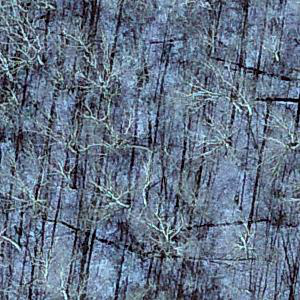

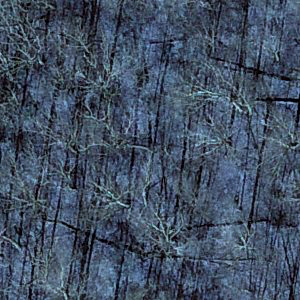

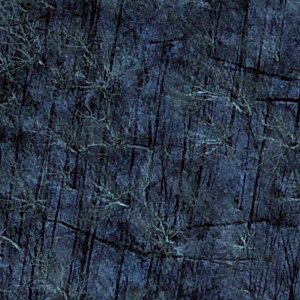

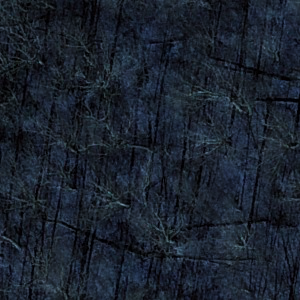

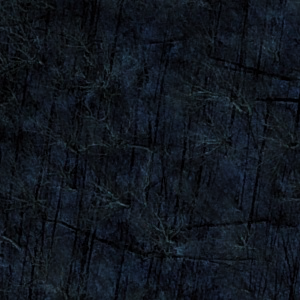

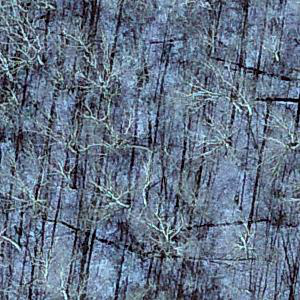

True

In [39]:
from PIL import Image
from PIL import ImageEnhance
import numpy
import blend_modes 
import cv2
from google.colab.patches import cv2_imshow

# Import background image

path='/content/42-46_'
file_name = ['2010', '2014', '2016', '2017','2018'] 
last = len(file_name)-1

background_img_raw = Image.open(path + file_name[last] + '.jpg').convert('RGBA') 
background_img_float = numpy.array(background_img_raw).astype(float) 
copy_background = background_img_float  

for year in file_name[last -1: :-1]:

  cv2_imshow(numpy.uint8(background_img_float))

  foreground_img_raw = Image.open(path + year + '.jpg').convert('RGBA') 
  foreground_img_float = numpy.array(foreground_img_raw).astype(float)  

  # Blend images
  blended_img_float = blend_modes.multiply(background_img_float, 
                                         foreground_img_float,                                       
                                         opacity = 0.5
                                         )
  background_img_float = blended_img_float
  

# Image needs to be converted back to uint8 type for PIL handling.
cv2_imshow(numpy.uint8(blended_img_float))
cv2_imshow(numpy.uint8(copy_background))
cv2.imwrite('output.jpg', numpy.uint8(blended_img_float))


 Basic Linear Transforms 
-------------------------
* Enter the alpha value [1.0-3.0]: 2
* Enter the beta value [0-100]: 50


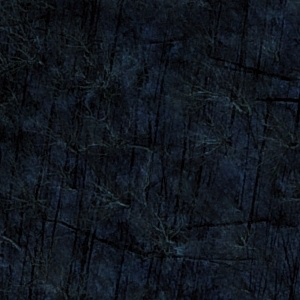

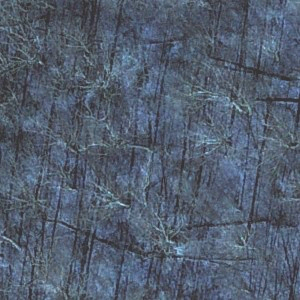

In [40]:

from google.colab.patches import cv2_imshow
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse
# Read image given by user

image = cv.imread('/content/output.jpg')

new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control
# Initialize values
print(' Basic Linear Transforms ')
print('-------------------------')
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
cv2_imshow(image)
cv2_imshow(new_image)



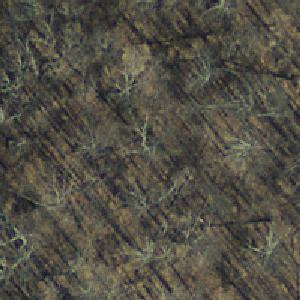

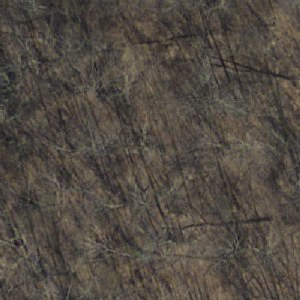

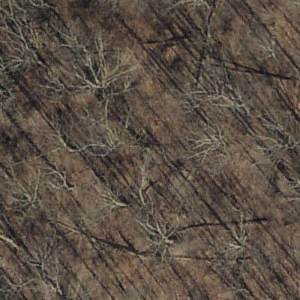

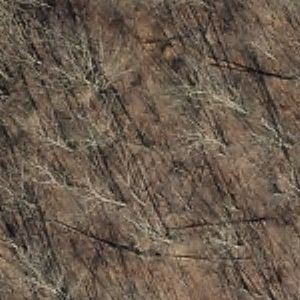

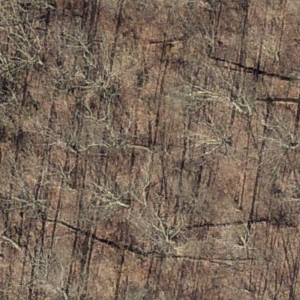

In [20]:
import cv2
from google.colab.patches import cv2_imshow


path='/content/42-46_'
file_name = ['2010', '2014', '2016', '2017','2018'] 
last = len(file_name)

alpha = 0.5
beta = (1.0 - alpha)

img1 = cv2.imread(path + file_name[0] + '.jpg')

for year in file_name[1: last]:
  cv2_imshow(img1)
  img2 = cv2.imread(path + year + '.jpg')
  out = cv2.addWeighted(img1, alpha, img2, beta, 0)
  img1 = out

cv2_imshow(out)

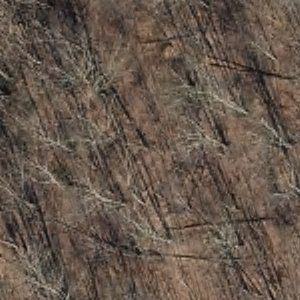

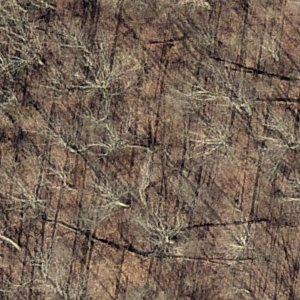

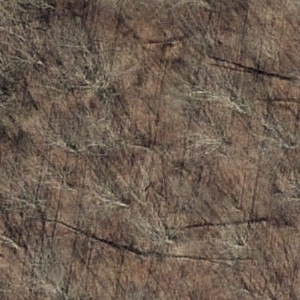

In [43]:
import cv2
from google.colab.patches import cv2_imshow


path='/content/42-46_'
file_name = [ '2014', '2016', '2017','2018'] 
last = len(file_name)

alpha = 0.5
beta = (1.0 - alpha)

img1 = cv2.imread(path + file_name[0] + '.jpg')
img2 = cv2.imread(path + file_name[2] + '.jpg')
out1 = cv2.addWeighted(img1, alpha, img2, beta, 0)
cv2_imshow(out1)

img3 = cv2.imread(path + file_name[1] + '.jpg')
img4 = cv2.imread(path + file_name[3] + '.jpg')
out2 = cv2.addWeighted(img3, alpha, img4, beta, 0)
cv2_imshow(out2)

out = cv2.addWeighted(out1, alpha, out2, beta, 0)

cv2_imshow(out)